In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as pp

In [2]:
iris_data_set = pd.read_csv('/home/sid/Desktop/IrisData.csv')
#setosa_data_set = iris_data_set.loc['I. setosa']

for i, (key,value) in enumerate( iris_data_set['Species'].str.split()):
    iris_data_set.loc[i,'Species'] = value

iris_data_set.set_index(['Species'], inplace = True)

setosa_data_set = iris_data_set.loc['setosa']
setosa_data_set_mean = setosa_data_set.mean().values
setosa_data_set_values = setosa_data_set.values

versicolor_data_set = iris_data_set.loc['versicolor']
versicolor_data_set_mean = versicolor_data_set.mean().values
versicolor_data_set_values = versicolor_data_set.values

virginica_data_set = iris_data_set.loc['virginica']
virginica_data_set_mean = virginica_data_set.mean().values
virginica_data_set_values = virginica_data_set.values

def sum (data_set, mean):
    sum_matrix = np.zeros(4)
    for value in data_set:
        sum_matrix = sum_matrix + np.outer(value-mean, value-mean)
    return sum_matrix
    
setosa_sum = sum(setosa_data_set_values,setosa_data_set_mean)
versicolor_sum = sum(versicolor_data_set_values,versicolor_data_set_mean)
virginica_sum = sum(virginica_data_set_values,virginica_data_set_mean)

def newCoordinates (data_set1_sum, data_set2_sum, data_set1_mean, data_set2_mean, data_set1, data_set2):
    
    SW_dataset_inv = np.linalg.inv(data_set1_sum+data_set2_sum)
    weight_vector = np.matmul(SW_dataset_inv, data_set2_mean-data_set1_mean)
    new_setosa_coor = [np.inner(weight_vector, value) for count,value in enumerate(data_set1)]
    
    new_versicolor_coor = [np.inner(weight_vector, value) for count,value in enumerate(data_set2)]
    
    return new_setosa_coor,new_versicolor_coor

    


setVer_setosa_coor, setVer_versicolor_coor = newCoordinates(setosa_sum, versicolor_sum, setosa_data_set_mean, versicolor_data_set_mean, 
                                             setosa_data_set_values, versicolor_data_set_values)

setVer_setosa_coor.sort()
setVer_versicolor_coor.sort()
max_setosa_value = setVer_setosa_coor[len(setVer_setosa_coor)-1]

min_versicolor_value = setVer_versicolor_coor[0]

setosa_versicolor_point_seperation = max_setosa_value + (min_versicolor_value - max_setosa_value)/2

setVir_setosa_coor, setVer_virginica_coor = newCoordinates(setosa_sum, virginica_sum, setosa_data_set_mean, virginica_data_set_mean, 
                                            setosa_data_set_values, virginica_data_set_values)

setVir_setosa_coor.sort()
setVer_virginica_coor.sort()
max_setosa_value = setVer_setosa_coor[len(setVir_setosa_coor)-1]
min_virginica_value = setVer_virginica_coor[0]
setosa_virginica_point_seperation = max_setosa_value + (min_virginica_value - max_setosa_value)/2

VerVir_versicolor_coor, VerVir_virginica_coor = newCoordinates(versicolor_sum, 
virginica_sum, versicolor_data_set_mean, virginica_data_set_mean, 
versicolor_data_set_values, virginica_data_set_values)

VerVir_versicolor_coor.sort()
VerVir_virginica_coor.sort()
max_versicolor_value = VerVir_versicolor_coor[len(VerVir_versicolor_coor)-1]
min_virginica_value = VerVir_virginica_coor[0]
versicolor_virginica_point_seperation = max_versicolor_value + (min_virginica_value - max_versicolor_value)/2

print ("Best possible threshold for versicolor, virginica case " + str(versicolor_virginica_point_seperation) + "\n")
print ("Best possible threshold for setosa, versicolor case " + str(setosa_versicolor_point_seperation)  + "\n")
print ("Best possible threshold for setosa, virginica case " + str(setosa_virginica_point_seperation)  + "\n")


total_misclassified_point_verVis = len([1 for i in VerVir_versicolor_coor if i >= versicolor_virginica_point_seperation])+len([1 for i in VerVir_virginica_coor 
                                        if i <= versicolor_virginica_point_seperation])

total_misclassified_point_setVer = len([1 for i in setVer_setosa_coor if i >= setosa_versicolor_point_seperation])+len([1 for i in setVer_versicolor_coor
                                        if i <= setosa_versicolor_point_seperation])

total_misclassified_point_setVir = len([1 for i in setVir_setosa_coor if i >= setosa_virginica_point_seperation])+len([1 for i in setVer_virginica_coor
                                        if i <= setosa_virginica_point_seperation])

    
print ("Total misclassified points for versicolor, virginica case " + 
       str(total_misclassified_point_verVis)  + "\n")
print ("Total misclassified points for setosa, versicolor case " +
       str(total_misclassified_point_setVer)  + "\n")
print ("Total misclassified points for setosa, virginica case " +
       str(total_misclassified_point_setVir)  + "\n")

Best possible threshold for versicolor, virginica case 0.17891374136124716

Best possible threshold for setosa, versicolor case 0.10672697776385007

Best possible threshold for setosa, virginica case 0.46040688368484517

Total misclassified points for versicolor, virginica case 2

Total misclassified points for setosa, versicolor case 0

Total misclassified points for setosa, virginica case 0



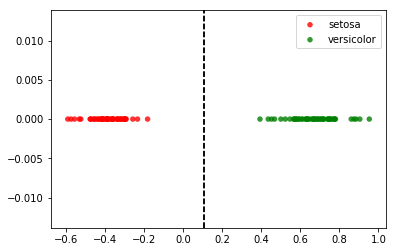

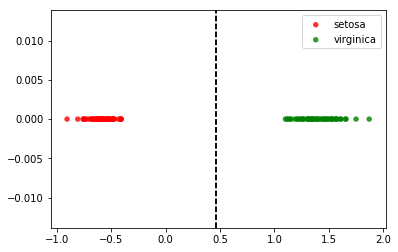

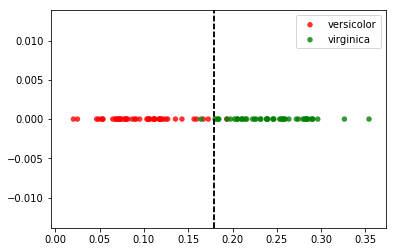

In [3]:
data1 = (setVer_setosa_coor, setVer_versicolor_coor)
colors1 = ("red", "green")
groups1 = ("setosa", "versicolor") 

data2 = (setVir_setosa_coor, setVer_virginica_coor)
colors2 = ("red", "green")
groups2 = ("setosa", "virginica") 

data3 = (VerVir_versicolor_coor, VerVir_virginica_coor)
colors3 = ("red", "green")
groups3 = ("versicolor", "virginica") 

# Create plot
fig = pp.figure()
ax1 = fig.add_subplot(1, 1, 1)
 
for data, color, group in zip(data1, colors1, groups1):
    x = data
    y = np.zeros(len(x))
    ax1.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=30, label=group)
    ax1.axvline(x=setosa_versicolor_point_seperation, color='k', linestyle='--')
pp.legend()
pp.show()

fig = pp.figure()
ax2 = fig.add_subplot(1, 1, 1)

for data, color, group in zip(data2, colors2, groups2):
    x = data
    y = np.zeros(len(x))
    ax2.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=30, label=group)
    ax2.axvline(x=setosa_virginica_point_seperation, color='k', linestyle='--')
    
pp.legend()
pp.show()
fig = pp.figure()
ax3 = fig.add_subplot(1, 1, 1)

for data, color, group in zip(data3, colors3, groups3):
    x = data
    y = np.zeros(len(x))
    ax3.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=30, label=group)
    ax3.axvline(x=versicolor_virginica_point_seperation, color='k', linestyle='--')

pp.legend()
pp.show()